# Physics 300 
## Computational Physics I (Fall 2017)
## BPB-248, Tues/Thurs 10:00 - 11:15 am 

|Instructor| Prof. Qiang Zhu|
|--|-------------------------------|
|Email | qiang.zhu@unlv.edu|
|Website|http://www.physics.unlv.edu/~qzhu/|
|Office| BPB 232|
|Office hours | Tues/Thurs 8:30 - 10:00 |

# 15 Random Number

There are a lot of processes in physics are random or nearly random, like raioactive decay, Browian motion for instances. To mimic randomness our computer programs themselves will need to know how to generate the random numbers first.

## 15.1 Uniform Random Number generators

Let's start with the following equation:

x' = (ax + c) mod m,

where a, c and m are integer constants and x is an integer variable. Given a value for x, this equation takes that
value and turns into a new integer value x'.

Now suppose we take that new value and plug it back in on the righ-hand side of the equation again and get another value. 
Repeating it for many times, we get a stream of integers. 


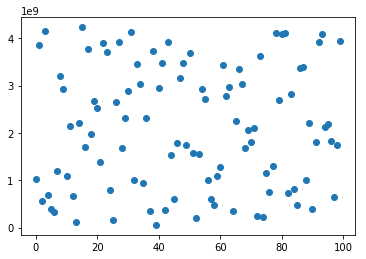

In [1]:
# A code to generate pseudo random numbers

import matplotlib.pyplot as plt

N = 100
a = 1664525
c = 1013904223
m = 4245035300
x = 1
results = []

for i in range(N):
    x = (a*x+c)%m
    results.append(x)
plt.plot(results,"o")
plt.show()

As it showes above, we calculated the first 100 numbers in the sequence generated by the equation with some a, c, m numbers. 
If we run the program, the generated numbers appear to be quite random.

This is a _linear congruential random number generator_, which generates a string of random integers by iterating the same equation for many times. It is the most fundamental way of generating random numbers. 

- 1, The numbers are not truly random. If you know the values of a, c and m, plus the starting values, you can exactly 
predict the numbers. If you use the same set of parameters, you must get the same values for each run.

- 2, The numbers are always positive or zero.

- 3, The results are very sensitive to the choice of a, c, m values. If c and m were choosen both even, the process would only
generate even numbers or only odd numbers. It is wise to use only values which have been thouroughly tested.

- 4, For a particular set of {a, c, m}, you can staill get different sequence of random numbers by varying the starting number
of x. The initial values is called _seed_ for the random number generator.

Provided that one is aware of these conditions, the _linear congruential random number generator_ can be used to generate pseudo random numbers for most of the simple calculations.

### Quiz

- 1, Test different {a, c, m, x0} values, and see how the _linear congruential random number generator_ behaves.
- 2, What's the period of the random number generator for each set of {a,c,m}?

## 15.2 The choice of a, c, m
In the scheme of _linear congruential random number generator_, the choice of {a, c, m} is really nontrivial as it 
determines the quality of data. One option, a = $7^7$ = 16807, c=0, m=2^31-1 = 2,147,483,647, has been tested and found
to be an excellent choice for 32-bit computers. 


## 15.3 Random Number Seeds
As we saw in the above case, a random number generator can have a seed, which is an input value that tells the generator where
to start its sequence. In order to start the random number generator differently every time, one needs to have a systematic way 
of obtaning a different initial seed. Otherwise, one would end up with exactly the same result if one starts the program with exactly the same initial seed. Almost every computer has intrisic function routines to report the current time in an integer form. For example, one could use the timestamp here.

```
year:   0<=iy<=99
month:  1<=im<=12
day:    1<=id<=31
hour:   0<=ih<=23
minute: 0<=in<=59
second: 0<=is<=59
```

Then one can choose

I_seed = iy + 70(im + 12{id + 31[ih + 23(in + 59is)]}) 

as the initial seed, which is roughly in the region of $[0, 2^{31}-1]$. The results should never be the same within 100 years. This is also how the random seeds are generated in the current computer.

On the other hand, the fixed random seeds could be very convenient when one wants to debug a code which contains some part of  random number generation. In the case, you just need to insert some fixed seed number which ensure that you always get the consistent numbers.

## 15.4 Random package in numpy

In the modern computer, the real way of generating the random numbers is a bit more complicated than the _linear congruential random number generator_. It is a bit more tricky to program. Fortunately, most programming languages offers built-in functions
to generate the numbers. In python, such package could be found in numpy.

```python
import numpy as np

np.random.seed(1)                     #set the seed for the random generated number 
np.random.randint(0,100,5)            #generate 5 random integers between [0,100]
np.random.random(100)                 #generate 100 random floats between [0,1]
print(a)
```


In [2]:
import numpy as np

np.random.seed(1)
a=np.random.randint(0,100,5)
b=np.random.randint(0,100,5)
print(a,b)
np.random.random_sample(10)

[37 12 72  9 75] [ 5 79 64 16  1]


array([ 0.18626021,  0.34556073,  0.39676747,  0.53881673,  0.41919451,
        0.6852195 ,  0.20445225,  0.87811744,  0.02738759,  0.67046751])

## 15.5 Homework

- a) Write a program that generates and prints out two random numbers between 1 and 6, to simulate the rolling of two dice.
- b) Modify your program to simulate the rolling of two dice a million times (N0) and count the number of times you get double six (N1). Calculate the probability of finding double six in your simulations (N1/N0) 

In [3]:
import numpy as np

np.random.seed(1)
a=np.random.randint(0,100,5)
b=np.random.randint(0,100,5)
print(a,b)
np.random.random_sample(10)

[37 12 72  9 75] [ 5 79 64 16  1]


array([ 0.18626021,  0.34556073,  0.39676747,  0.53881673,  0.41919451,
        0.6852195 ,  0.20445225,  0.87811744,  0.02738759,  0.67046751])